<a href="https://colab.research.google.com/github/Praneet9/Plant_Monitor/blob/master/Plant_Monitoring_256x256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://8edc17f2.ngrok.io/dataset.zip

--2019-01-05 05:16:10--  http://8edc17f2.ngrok.io/dataset.zip
Resolving 8edc17f2.ngrok.io (8edc17f2.ngrok.io)... 52.15.72.79, 2600:1f16:59e:b200:9824:7fb2:162:d476
Connecting to 8edc17f2.ngrok.io (8edc17f2.ngrok.io)|52.15.72.79|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62188368 (59M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  59.31M   761KB/s    in 69s     

2019-01-05 05:17:19 (880 KB/s) - ‘dataset.zip’ saved [62188368/62188368]



In [0]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/test/
   creating: dataset/test/Early_blight/
  inflating: dataset/test/Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178_final_masked.jpg  
  inflating: dataset/test/Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170_final_masked.jpg  
  inflating: dataset/test/Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885_final_masked.jpg  
  inflating: dataset/test/Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722_final_masked.jpg  
  inflating: dataset/test/Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015_final_masked.jpg  
  inflating: dataset/test/Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562_final_masked.jpg  
  inflating: dataset/test/Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020_final_masked.jpg  
  inflating: dataset/test/Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546_fina

In [0]:
ls

dataset/  dataset.zip  sample_data/


In [0]:

import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt

import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD, RMSprop, adadelta, Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
img_rows = 256
img_cols = 256
num_channels = 3
epochs = 5
num_classes = 3

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1),
                 activation='relu', input_shape=(img_rows, img_cols, num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(312, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 460800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 312)               143769912 
__________

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        shear_range=0.4,
        zoom_range=0.5,
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        # randomly rotate images in the range (degrees, 0 to 180)
        rotation_range=180,
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.4,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.4,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

test_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        shear_range=0.4,
        zoom_range=0.5,
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        # randomly rotate images in the range (degrees, 0 to 180)
        rotation_range=180,
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.4,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.4,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(img_rows, img_cols),
        color_mode="rgb",
        batch_size=32,
        class_mode="categorical",
        shuffle=True,)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(img_rows, img_cols),
        color_mode="rgb",
        batch_size=32,
        class_mode="categorical",
        shuffle=True,)

Found 4500 images belonging to 3 classes.
Found 2152 images belonging to 3 classes.


In [0]:
augmented_checkpoint = ModelCheckpoint('augmented_best_model.hdf5',  # model filename
                                       monitor='val_loss',  # quantity to monitor
                                       verbose=1,  # verbosity - 0 or 1
                                       save_best_only=True,  # The latest best model will not be overwritten
                                       mode='auto')  # The decision to overwrite model is made
# automatically depending on the quantity to monitor

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,  # Better loss function for neural networks
              optimizer=keras.optimizers.Adam(),  # Adam optimizer with 1.0e-4 learning rate
              metrics=['accuracy'])  # Metrics to be evaluated by the model

In [14]:
model.fit_generator(generator=train_generator,
                    validation_data=test_generator,
                    epochs=epochs,
                    callbacks=[augmented_checkpoint],
                    verbose=1,
                    steps_per_epoch=128,
                    validation_steps=64,
)

Epoch 1/5
128/128 [==============================] - 1150s 9s/step - loss: 0.9280 - acc: 0.5657 - val_loss: 1.2654 - val_acc: 0.3972

Epoch 00001: val_loss improved from inf to 1.26540, saving model to augmented_best_model.hdf5
Epoch 2/5
128/128 [==============================] - 1140s 9s/step - loss: 0.7099 - acc: 0.6868 - val_loss: 2.4313 - val_acc: 0.2189

Epoch 00002: val_loss did not improve from 1.26540
Epoch 3/5
128/128 [==============================] - 1134s 9s/step - loss: 0.6038 - acc: 0.7182 - val_loss: 1.7692 - val_acc: 0.3088

Epoch 00003: val_loss did not improve from 1.26540
Epoch 4/5
128/128 [==============================] - 1135s 9s/step - loss: 0.6020 - acc: 0.7256 - val_loss: 2.2963 - val_acc: 0.2703

Epoch 00004: val_loss did not improve from 1.26540
Epoch 5/5
128/128 [==============================] - 1137s 9s/step - loss: 0.5594 - acc: 0.7368 - val_loss: 2.3204 - val_acc: 0.3286

Epoch 00005: val_loss did not improve from 1.26540


In [0]:
%matplotlib inline

import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.preprocessing import image

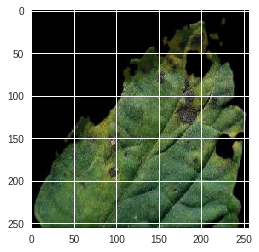

In [18]:
img_path = 'dataset/train/Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389_final_masked.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

In [0]:
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [0]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

In [24]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 254, 254, 32)


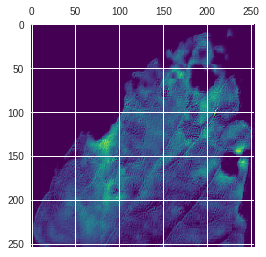

In [25]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


MemoryError: ignored

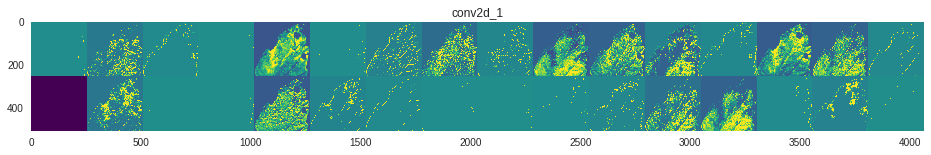

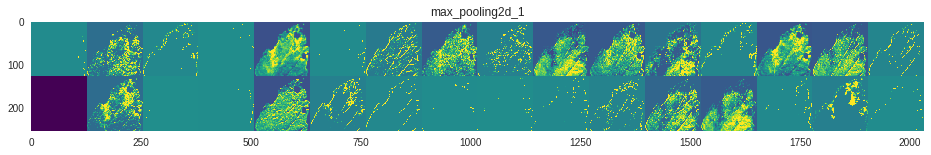

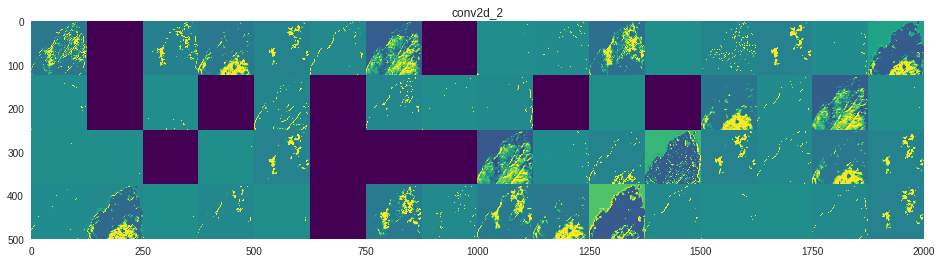

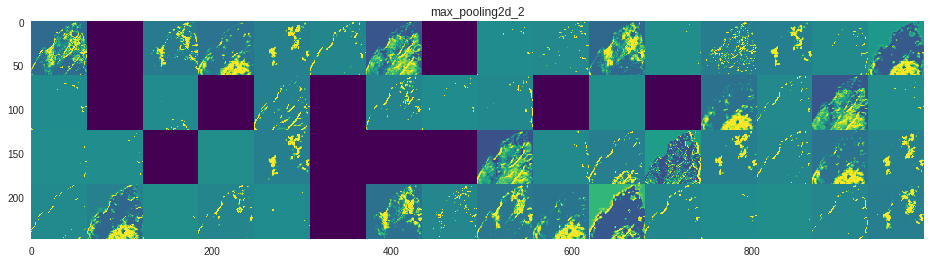

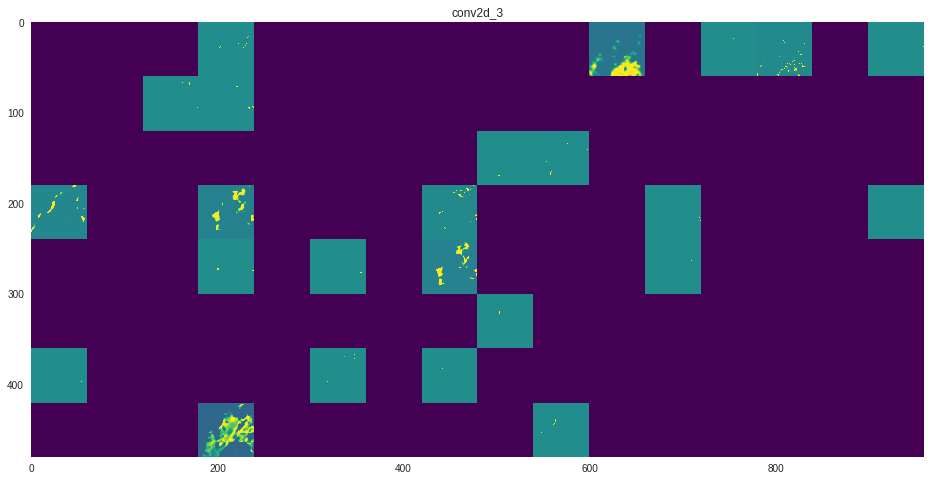

In [28]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')